# Load image and generate landmarks

In [1]:
import os
import math
import numpy as np
import face_recognition


LABELS = ['22q11','Angelman','Apert','CDL','Down','FragileX','Marfan','Progeria','Sotos','TreacherCollins','Turner','Williams']


def load_dataset(setPath):
    X = []
    y = []

    for label in LABELS:
        directory = os.path.join(setPath,label)
        for f in os.listdir(directory):
            path = os.path.join(directory,f)
            
            if os.path.isfile(path) and f != 'desktop.ini':
                
                # Extract landmarks
                image = face_recognition.load_image_file(path)
                face_locations = face_recognition.face_locations(image)
                face_landmarks_list = face_recognition.face_landmarks(image)

                # Iterate through detected faces
                keypoints = []
                for i in range(0,len(face_landmarks_list)):
                    (top,right,bottom,left) = face_locations[i]
                    landmarks = face_landmarks_list[i]
                    
                    height = (bottom - top)
                    width = (right - left)
                    
                    cY = top + height/2.0
                    cX = left + width/2.0
                    
                    # Center and append to points list
                    first = True
                    transform = None
                    points = []
                    for featureType in landmarks.keys():
                        for point in landmarks[featureType]:
                            
                            if first: # convert first point distance to be 1
                                first = False
                                transform = 1.0 / math.sqrt((point[0] - cY)**2 + (point[1] - cX)**2)
                            
                            rectifiedPoint = [(point[0]- cY) / transform,(point[1] - cX) / transform]
                            
                            points = points + rectifiedPoint
    
                    # Store result
                    keypoints.append(points)

                # Append to dataset
                for facePoints in keypoints:
                    X.append(facePoints)
                    y.append(label)
    
    return np.array(X), np.array(y)

In [2]:
X_test, y_test = load_dataset('./data/raw/Test')
print(X_test.shape)
print(y_test.shape)

(312, 144)
(312,)


In [3]:
X_train, y_train = load_dataset('./data/raw/Train')
print(X_train.shape)
print(y_train.shape)

(1023, 144)
(1023,)


## SVM Approach

In [4]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-0.00180121  0.00020478 -0.00145854 ... -0.00046    -0.00039503
   0.00136359]
 [ 0.0032865  -0.0018114  -0.00624242 ... -0.00731118  0.00406841
  -0.0008509 ]
 [-0.00507331  0.00243582 -0.0021989  ... -0.00431204  0.00047811
  -0.00479425]
 ...
 [ 0.00217365 -0.00321037 -0.00187862 ... -0.00506879 -0.00146064
   0.00079265]
 [ 0.00165298  0.0058337   0.00128671 ... -0.00476309  0.0016526
  -0.00114428]
 [-0.00303639 -0.00798161  0.00032962 ...  0.00071084 -0.00071636
  -0.00474815]]
[-7.51356340e-05 -4.24482368e-03 -1.24999328e-03 -3.07076915e-03
 -3.37396155e-03  1.08687223e-03 -2.28912539e-04 -1.53287043e-03
 -5.45991530e-04 -1.37777088e-03 -1.30960979e-04 -1.43059672e-03]


/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.6500488758553274


Text(69.0, 0.5, 'Actual')

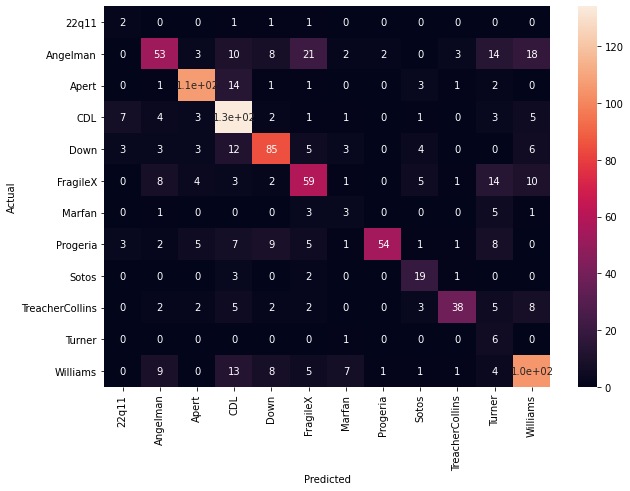

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.5192307692307693


Text(69.0, 0.5, 'Actual')

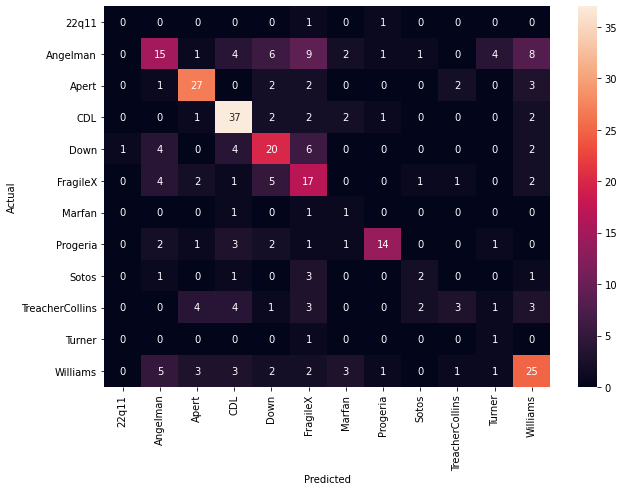

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Neural Network Approach

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 294, loss = 2.22143132
Iteration 295, loss = 2.22117009
Iteration 296, loss = 2.22094401
Iteration 297, loss = 2.22068741
Iteration 298, loss = 2.22044142
Iteration 299, loss = 2.22022311
Iteration 300, loss = 2.21999160
Iteration 301, loss = 2.21977361
Iteration 302, loss = 2.21956038
Iteration 303, loss = 2.21929291
Iteration 304, loss = 2.21907441
Iteration 305, loss = 2.21883748
Iteration 306, loss = 2.21862617
Iteration 307, loss = 2.21840603
Iteration 308, loss = 2.21820323
Iteration 309, loss = 2.21797920
Iteration 310, loss = 2.21773793
Iteration 311, loss = 2.21752927
Iteration 312, loss = 2.21731280
Iteration 313, loss = 2.21709962
Iteration 314, loss = 2.21689070
Iteration 315, loss = 2.21667898
Iteration 316, loss = 2.21648291
Iteration 317, loss = 2.21626099
Iteration 318, loss = 2.21606847
Iteration 319, loss = 2.21587384
Iteration 320, loss = 2.21570476
Iteration 321, loss = 2.21552103
Iteration 322, loss = 2.21534786
Iteration 323, loss = 2.21516797
Iteration 

Iteration 545, loss = 2.19893141
Iteration 546, loss = 2.19891559
Iteration 547, loss = 2.19887311
Iteration 548, loss = 2.19884843
Iteration 549, loss = 2.19881193
Iteration 550, loss = 2.19878776
Iteration 551, loss = 2.19875640
Iteration 552, loss = 2.19872283
Iteration 553, loss = 2.19870834
Iteration 554, loss = 2.19865881
Iteration 555, loss = 2.19863055
Iteration 556, loss = 2.19862362
Iteration 557, loss = 2.19859496
Iteration 558, loss = 2.19858992
Iteration 559, loss = 2.19854588
Iteration 560, loss = 2.19853055
Iteration 561, loss = 2.19849187
Iteration 562, loss = 2.19845968
Iteration 563, loss = 2.19843248
Iteration 564, loss = 2.19839204
Iteration 565, loss = 2.19839128
Iteration 566, loss = 2.19834580
Iteration 567, loss = 2.19830531
Iteration 568, loss = 2.19828744
Iteration 569, loss = 2.19825240
Iteration 570, loss = 2.19822968
Iteration 571, loss = 2.19822300
Iteration 572, loss = 2.19819780
Iteration 573, loss = 2.19817433
Iteration 574, loss = 2.19814912
Iteration 

Iteration 800, loss = 2.19529941
Iteration 801, loss = 2.19528678
Iteration 802, loss = 2.19529387
Iteration 803, loss = 2.19528527
Iteration 804, loss = 2.19528749
Iteration 805, loss = 2.19526950
Iteration 806, loss = 2.19526641
Iteration 807, loss = 2.19525209
Iteration 808, loss = 2.19525692
Iteration 809, loss = 2.19525139
Iteration 810, loss = 2.19523635
Iteration 811, loss = 2.19524713
Iteration 812, loss = 2.19523502
Iteration 813, loss = 2.19523072
Iteration 814, loss = 2.19522978
Iteration 815, loss = 2.19523478
Iteration 816, loss = 2.19523465
Iteration 817, loss = 2.19522299
Iteration 818, loss = 2.19521604
Iteration 819, loss = 2.19521421
Iteration 820, loss = 2.19519995
Iteration 821, loss = 2.19519540
Iteration 822, loss = 2.19519246
Iteration 823, loss = 2.19518342
Iteration 824, loss = 2.19517089
Iteration 825, loss = 2.19516360
Iteration 826, loss = 2.19515241
Iteration 827, loss = 2.19514163
Iteration 828, loss = 2.19514670
Iteration 829, loss = 2.19513892
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.15933528836754643


Text(69.0, 0.5, 'Actual')

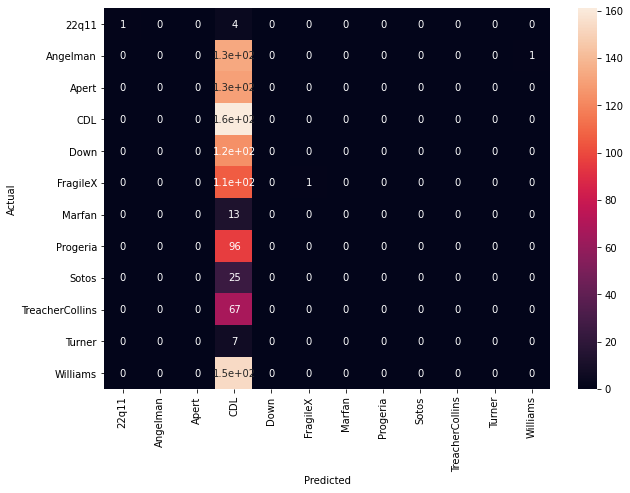

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.15384615384615385


Text(69.0, 0.5, 'Actual')

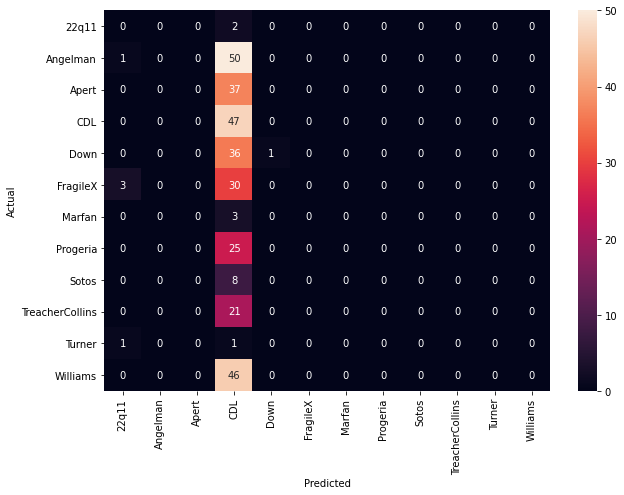

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## PCA SVM

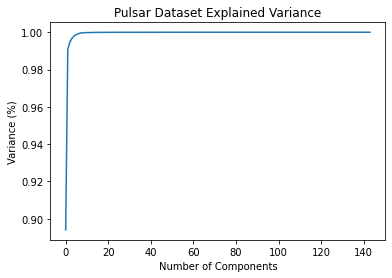

In [14]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train_pca, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 1.73251122e-05 -1.23266918e-06 -1.59364199e-05  3.33014116e-05
   5.25273947e-06  1.48091827e-05  4.34566043e-05  4.45104174e-05
   6.13353095e-05 -2.81502470e-05]
 [ 2.71527363e-06  2.95963130e-05 -3.62071852e-05  1.53097828e-05
  -2.50358951e-05  7.76258909e-05 -3.52704305e-08 -4.71328021e-05
   2.47708950e-05  1.11766761e-04]
 [-1.93658688e-05 -8.64603320e-06 -3.81334583e-06 -2.37937029e-05
   4.02829559e-06 -6.54187153e-05  4.66395268e-05  7.82797975e-05
  -1.02727631e-05  2.00018050e-05]
 [ 2.18048612e-06  3.04139673e-05  1.22877217e-05  2.52813888e-05
  -3.55453830e-05 -5.21702200e-05 -3.10156935e-05  3.54016726e-05
   1.38281393e-04 -5.08300808e-05]
 [-1.33504753e-05  4.67489344e-07  1.27000272e-05  5.15658268e-05
  -8.08355614e-06 -1.07231547e-05 -6.52021688e-06  1.08930088e-04
  -1.42784509e-06  8.27742883e-05]
 [ 1.39241804e-05  4.89606962e-06  5.40804364e-06  3.93818353e-06
  -7.23965129e-06  2.52611603e-05  7.50574865e-06  7.40574037e-05
   8.71230999e-05 -9.16864028e-06

/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.15542521994134897


Text(69.0, 0.5, 'Actual')

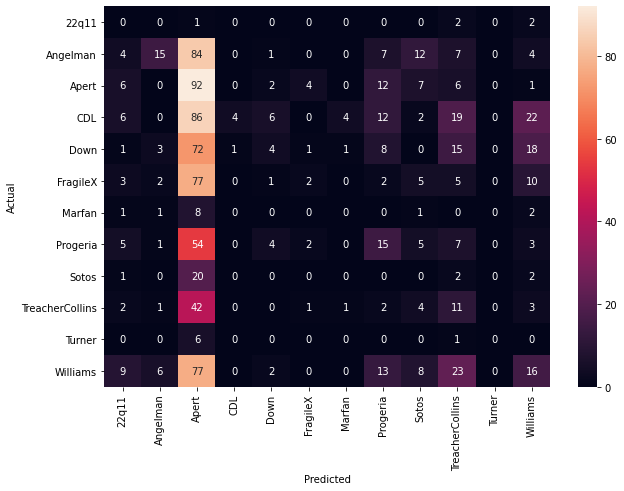

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.1346153846153846


Text(69.0, 0.5, 'Actual')

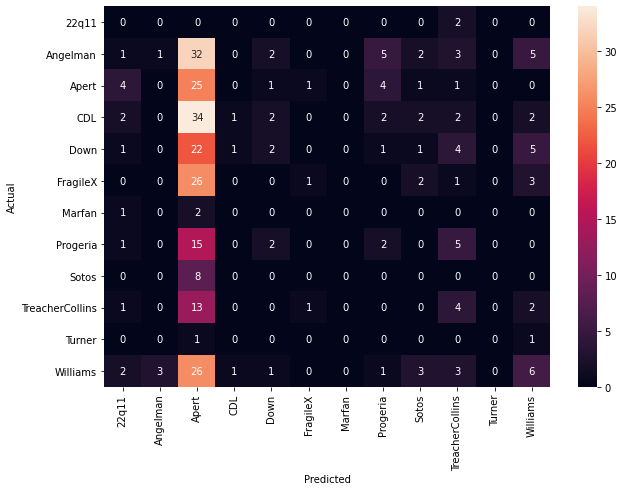

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## PCA Neural Network

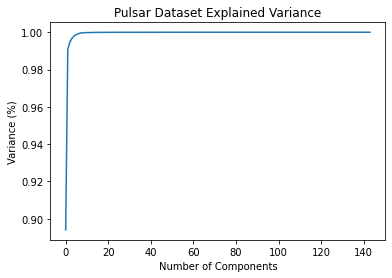

In [21]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train_pca, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 326, loss = inf
Iteration 327, loss = inf
Iteration 328, loss = inf
Iteration 329, loss = inf
Iteration 330, loss = inf
Iteration 331, loss = inf
Iteration 332, loss = inf
Iteration 333, loss = inf
Iteration 334, loss = inf
Iteration 335, loss = inf
Iteration 336, loss = inf
Iteration 337, loss = inf
Iteration 338, loss = inf
Iteration 339, loss = inf
Iteration 340, loss = inf
Iteration 341, loss = inf
Iteration 342, loss = inf
Iteration 343, loss = inf
Iteration 344, loss = inf
Iteration 345, loss = inf
Iteration 346, loss = inf
Iteration 347, loss = inf
Iteration 348, loss = inf
Iteration 349, loss = inf
Iteration 350, loss = inf
Iteration 351, loss = inf
Iteration 352, loss = inf
Iteration 353, loss = inf
Iteration 354, loss = inf
Iteration 355, loss = inf
Iteration 356, loss = inf
Iteration 357, loss = inf
Iteration 358, loss = inf
Iteration 359, loss = inf
Iteration 360, loss = inf
Iteration 361, loss = inf
Iteration 362, loss = inf
Iteration 363, loss = inf
Iteration 36

Iteration 648, loss = inf
Iteration 649, loss = inf
Iteration 650, loss = inf
Iteration 651, loss = inf
Iteration 652, loss = inf
Iteration 653, loss = inf
Iteration 654, loss = inf
Iteration 655, loss = inf
Iteration 656, loss = inf
Iteration 657, loss = inf
Iteration 658, loss = inf
Iteration 659, loss = inf
Iteration 660, loss = inf
Iteration 661, loss = inf
Iteration 662, loss = inf
Iteration 663, loss = inf
Iteration 664, loss = inf
Iteration 665, loss = inf
Iteration 666, loss = inf
Iteration 667, loss = inf
Iteration 668, loss = inf
Iteration 669, loss = inf
Iteration 670, loss = inf
Iteration 671, loss = inf
Iteration 672, loss = inf
Iteration 673, loss = inf
Iteration 674, loss = inf
Iteration 675, loss = inf
Iteration 676, loss = inf
Iteration 677, loss = inf
Iteration 678, loss = inf
Iteration 679, loss = inf
Iteration 680, loss = inf
Iteration 681, loss = inf
Iteration 682, loss = inf
Iteration 683, loss = inf
Iteration 684, loss = inf
Iteration 685, loss = inf
Iteration 68

Iteration 944, loss = 14.18747956
Iteration 945, loss = 17.83706993
Iteration 946, loss = 15.96955855
Iteration 947, loss = 19.34033760
Iteration 948, loss = 19.10634310
Iteration 949, loss = 26.93884859
Iteration 950, loss = 30.93167820
Iteration 951, loss = 19.36142683
Iteration 952, loss = 25.22774351
Iteration 953, loss = 20.52960238
Iteration 954, loss = 26.87420304
Iteration 955, loss = 24.72735865
Iteration 956, loss = 31.21605844
Iteration 957, loss = 34.96488002
Iteration 958, loss = 27.87737022
Iteration 959, loss = inf
Iteration 960, loss = 27.43760434
Iteration 961, loss = 25.75706143
Iteration 962, loss = 19.82818425
Iteration 963, loss = 17.70104844
Iteration 964, loss = 24.17115452
Iteration 965, loss = 19.22222225
Iteration 966, loss = 16.85189970
Iteration 967, loss = 18.78360783
Iteration 968, loss = 17.25559868
Iteration 969, loss = 19.19817952
Iteration 970, loss = 19.40319270
Iteration 971, loss = 18.56159398
Iteration 972, loss = inf
Iteration 973, loss = inf
Iter

Iteration 1207, loss = 9.94898915
Iteration 1208, loss = 9.50112083
Iteration 1209, loss = 8.11132446
Iteration 1210, loss = 7.67401563
Iteration 1211, loss = 7.91605235
Iteration 1212, loss = 8.02433181
Iteration 1213, loss = 9.57742655
Iteration 1214, loss = 8.04829523
Iteration 1215, loss = 8.92932586
Iteration 1216, loss = 10.54656975
Iteration 1217, loss = 9.14835086
Iteration 1218, loss = 13.07569338
Iteration 1219, loss = 10.51682792
Iteration 1220, loss = 9.90126726
Iteration 1221, loss = 9.43424501
Iteration 1222, loss = 11.14690766
Iteration 1223, loss = 12.31268210
Iteration 1224, loss = inf
Iteration 1225, loss = 10.24963783
Iteration 1226, loss = inf
Iteration 1227, loss = inf
Iteration 1228, loss = inf
Iteration 1229, loss = inf
Iteration 1230, loss = inf
Iteration 1231, loss = inf
Iteration 1232, loss = inf
Iteration 1233, loss = 21.13380326
Iteration 1234, loss = 15.88646861
Iteration 1235, loss = 15.23831917
Iteration 1236, loss = 13.66929532
Iteration 1237, loss = 14.

Iteration 1462, loss = 13.57370652
Iteration 1463, loss = 13.47994731
Iteration 1464, loss = 9.86968116
Iteration 1465, loss = 10.05747338
Iteration 1466, loss = 7.41471386
Iteration 1467, loss = 6.33707074
Iteration 1468, loss = 5.81963921
Iteration 1469, loss = 8.65228937
Iteration 1470, loss = 8.14266992
Iteration 1471, loss = 7.66500210
Iteration 1472, loss = 5.76214625
Iteration 1473, loss = 6.71303741
Iteration 1474, loss = 7.53321462
Iteration 1475, loss = 6.79683000
Iteration 1476, loss = 5.88738283
Iteration 1477, loss = 6.26838589
Iteration 1478, loss = 9.64554146
Iteration 1479, loss = 7.69215182
Iteration 1480, loss = 7.02703121
Iteration 1481, loss = 6.43031932
Iteration 1482, loss = 5.46471638
Iteration 1483, loss = 5.81103108
Iteration 1484, loss = 6.38385019
Iteration 1485, loss = 6.00291594
Iteration 1486, loss = 6.04218288
Iteration 1487, loss = 7.16276632
Iteration 1488, loss = inf
Iteration 1489, loss = inf
Iteration 1490, loss = inf
Iteration 1491, loss = inf
Itera

Iteration 1720, loss = 18.63691633
Iteration 1721, loss = inf
Iteration 1722, loss = 19.20706059
Iteration 1723, loss = 19.08475068
Iteration 1724, loss = 14.88770351
Iteration 1725, loss = 11.29215801
Iteration 1726, loss = 11.12041416
Iteration 1727, loss = 12.78539843
Iteration 1728, loss = 11.35060554
Iteration 1729, loss = 10.54386295
Iteration 1730, loss = 10.25716954
Iteration 1731, loss = 12.93289127
Iteration 1732, loss = 12.32451125
Iteration 1733, loss = 11.52313722
Iteration 1734, loss = 9.33449792
Iteration 1735, loss = 9.75706980
Iteration 1736, loss = 9.06610917
Iteration 1737, loss = 7.88771364
Iteration 1738, loss = 8.97748601
Iteration 1739, loss = 6.97236388
Iteration 1740, loss = 7.09010502
Iteration 1741, loss = 8.04335383
Iteration 1742, loss = 7.72450629
Iteration 1743, loss = 7.60806136
Iteration 1744, loss = 9.56188453
Iteration 1745, loss = 7.61697202
Iteration 1746, loss = 9.65973266
Iteration 1747, loss = 8.04816891
Iteration 1748, loss = 6.90181886
Iteratio

Iteration 1976, loss = 3.23798651
Iteration 1977, loss = 4.69822689
Iteration 1978, loss = 3.96001945
Iteration 1979, loss = 4.06626126
Iteration 1980, loss = 4.83547843
Iteration 1981, loss = 3.33897899
Iteration 1982, loss = 4.76154614
Iteration 1983, loss = 5.65544228
Iteration 1984, loss = 4.81629037
Iteration 1985, loss = 4.20935460
Iteration 1986, loss = 3.96198036
Iteration 1987, loss = 3.20801812
Iteration 1988, loss = 3.64619791
Iteration 1989, loss = 2.61464862
Iteration 1990, loss = 2.78395020
Iteration 1991, loss = 3.02804202
Iteration 1992, loss = 3.58072234
Iteration 1993, loss = 3.03644306
Iteration 1994, loss = 2.95656973
Iteration 1995, loss = 2.31114359
Iteration 1996, loss = 2.42129419
Iteration 1997, loss = 2.90299347
Iteration 1998, loss = 2.68202129
Iteration 1999, loss = 2.81428469
Iteration 2000, loss = 6.10096528


/home/curt/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred, normalize=False) / float(y_train.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.6871945259042033


Text(69.0, 0.5, 'Actual')

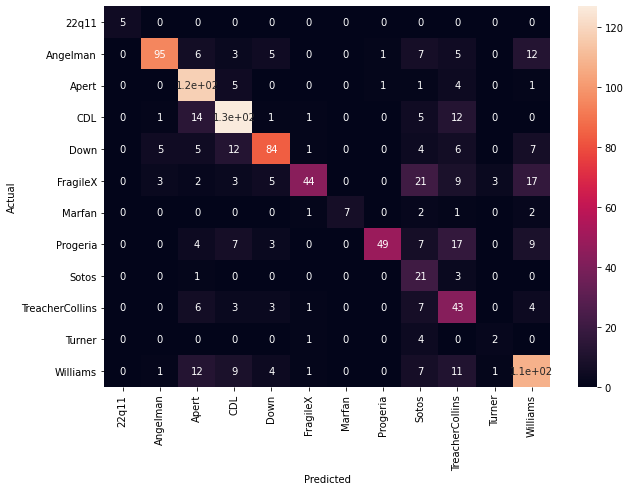

In [25]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred, normalize=False) / float(y_test.size)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.27564102564102566


Text(69.0, 0.5, 'Actual')

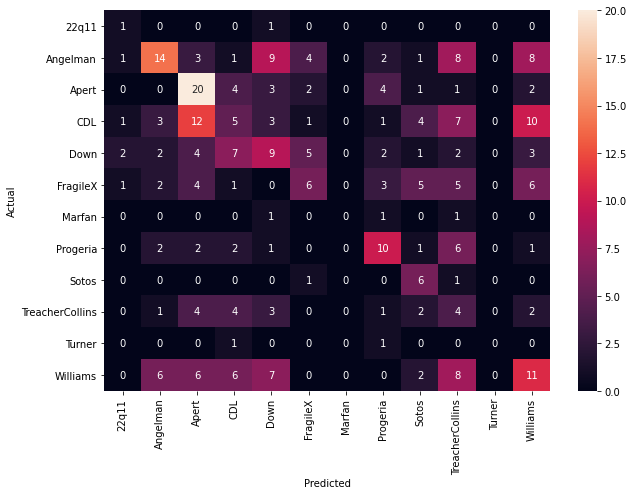

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')